In [5]:
import tensorflow as tf 
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.1


In [2]:
from tensorflow.keras.datasets import mnist

(x_train , y_train) , (x_test , y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

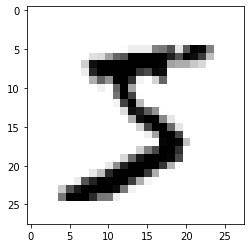

In [6]:
plt.imshow(x_train[0] , cmap='binary')
plt.show()

In [8]:
#the number of classes in the dataset

print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# one hot encoding

In [9]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [11]:
y_train_encoded.shape

(60000, 10)

# changing the input dimension , Flatten the input

In [14]:
import numpy as np 

x_train_reshaped = np.reshape(x_train , (60000 , 784))
x_test_reshaped = np.reshape(x_test , (10000 , 784))

# printing the unique pixels values in one image example

In [16]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


# Normalization

In [19]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10
x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

In [21]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

In [22]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(128 , activation='relu' , input_shape = (784,)),
                                    tf.keras.layers.Dense(128 , activation='relu'),
                                    tf.keras.layers.Dense(10 , activation='softmax')
])

model.compile(optimizer = 'SGD' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(x_train_norm , y_train_encoded , epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6425 - accuracy: 0.8075
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2004 - accuracy: 0.9399
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1479 - accuracy: 0.9567


In [24]:
# evaluating the model , this code return loss and accuracy we just need acc
_ , acc = model.evaluate(x_test_norm , y_test_encoded)
print(acc * 100)

313/313 [==============================] - 1s 1ms/step - loss: 0.1291 - accuracy: 0.9607
96.069997549057


In [26]:
#predicting to use prediction for plotting

preds = model.predict(x_test_norm)

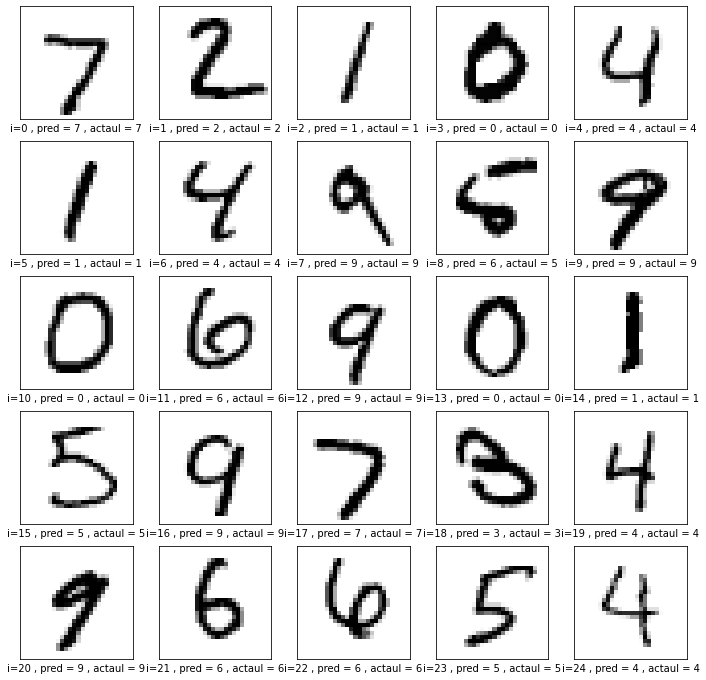

In [32]:
plt.figure(figsize=(12 , 12))

start_index = 0

for i in range(25):
  plt.subplot(5 , 5 , i+1)
  plt.grid( False)
  plt.xticks([])
  plt.yticks([])

  pred = np.argmax(preds[start_index + i])
  actual = y_test[start_index + i]
  plt.xlabel('i={} , pred = {} , actaul = {}'.format(start_index+i , pred , actual))
  plt.imshow(x_test[start_index + i] , cmap = 'binary')

plt.show()

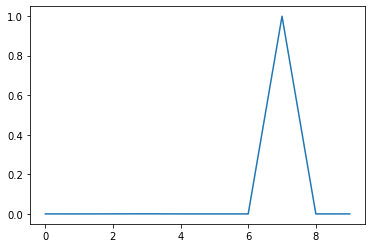

In [34]:
plt.plot(preds[0])
plt.show()